In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('housing.csv')

In [4]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


<AxesSubplot:xlabel='median_house_value', ylabel='Count'>

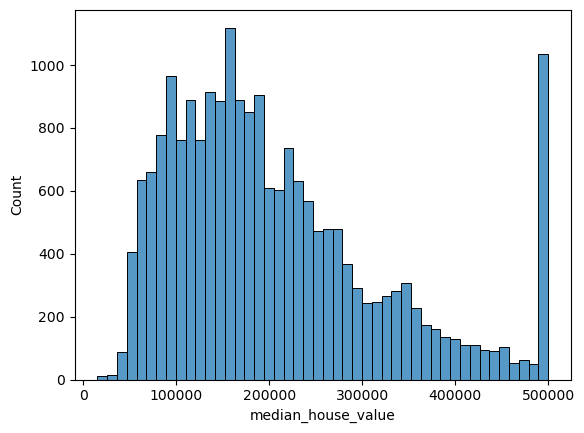

In [5]:
sns.histplot(df.median_house_value)

In [6]:
del df['ocean_proximity']

In [7]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


# Question 1

Find a feature with missing values. How many missing values does it have?

Answer: 207

In [8]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

# Question 2

What's the median (50% percentile) for variable 'population'?

Answer: 1166

In [9]:
df.population.median()

1166.0

# Question 3

    We need to deal with missing values for the column from Q1.
    We have two options: fill it with 0 or with the mean of this variable.
    Try both options. For each, train a linear regression model without regularization using the code from the       lessons.
    For computing the mean, use the training only!
    Use the validation dataset to evaluate the models and compare the RMSE of each option.
    Round the RMSE scores to 2 decimal digits using round(score, 2)
    Which option gives better RMSE?
    
Answer: both are equally good


In [10]:
# split the dataset
n = len(df)
n_val = int(n * 0.2)

n_test = int(n * 0.2)

n_train = n - n_val - n_test # get remainder because getting 60% with rounding is not accurate

n_val, n_test, n_train

(4128, 4128, 12384)

In [11]:
n_val + n_test + n_train == n

True

In [12]:
# shuffle records

idx = np.arange(n)  #  assign var to array of rows (indices)
np.random.seed(42)  #  make the shuffle reproducible
np.random.shuffle(idx) # shuffle the rows


In [13]:
len(idx)

20640

In [14]:
# split the data
df_train = df.iloc[idx[:n_train]] 
df_val = df.iloc[idx[n_train:n_train + n_val]]
df_test = df.iloc[idx[n_train + n_val:]]

In [15]:
n_val, n_test, n_train

(4128, 4128, 12384)

In [16]:
# apply logarithmic function and get target variables (y)
y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)


In [17]:
y_train

array([10.77270764, 10.7320612 , 13.12236738, ..., 11.89683321,
       11.93032573, 12.9487264 ])

In [18]:
# remove the target var from the sets so we don't accidentally use it to train the model
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

In [19]:
# code from the lessons
X = [
    [148, 24, 1385],
    [132, 25, 2031],
    [453, 11, 86],
    [158, 24, 185],
    [172, 25, 201],
    [413, 11, 86],
    [38,  54, 185],
    [142, 25, 431],
    [453, 31, 86],
]

X = np.array(X)
X

array([[ 148,   24, 1385],
       [ 132,   25, 2031],
       [ 453,   11,   86],
       [ 158,   24,  185],
       [ 172,   25,  201],
       [ 413,   11,   86],
       [  38,   54,  185],
       [ 142,   25,  431],
       [ 453,   31,   86]])

In [20]:
# code from the lessons
y = [10000, 20000, 15000, 20050, 10000, 20000, 15000, 25000, 12000]

In [21]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [22]:
train_linear_regression(X, y)

(25844.754055766763, array([ -16.08906468, -199.47254894,   -1.22802883]))

In [23]:
# first model with zeros replacing missing values
X_train = df_train.fillna(0).values
w0, w = train_linear_regression(X_train, y_train)
y_pred = w0 + X_train.dot(w)

In [24]:
y_pred

array([11.28055213, 11.90427911, 12.46507934, ..., 11.53259294,
       11.92377088, 12.54517195])

In [25]:
w0, w

(-11.686975241752823,
 array([-2.76255120e-01, -2.82087184e-01,  2.91329621e-03, -8.64531514e-06,
         1.50811922e-04, -2.08205659e-04,  5.69546573e-04,  1.71308139e-01]))

<AxesSubplot:ylabel='Count'>

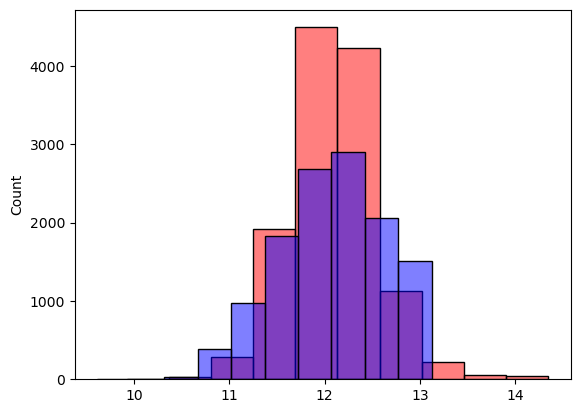

In [26]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=10)
sns.histplot(y_train, color='blue', alpha=0.5, bins=10)

In [27]:
# second model with the mean replacing missing values
mean_value = df.total_bedrooms.mean()
X_train_with_mean = df_train.fillna(mean_value).values
w0_mean, w_mean = train_linear_regression(X_train_with_mean, y_train)
y_pred_mean = w0_mean + X_train_with_mean.dot(w_mean)

<AxesSubplot:ylabel='Count'>

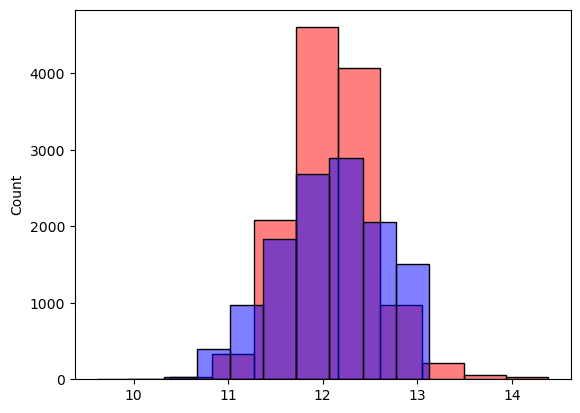

In [28]:
sns.histplot(y_pred_mean, color='red', alpha=0.5, bins=10)
sns.histplot(y_train, color='blue', alpha=0.5, bins=10)

In [29]:
# third model with the median replacing missing values
median_value = df.total_bedrooms.median()
X_train_with_med = df_train.fillna(median_value).values
w0_med, w_med = train_linear_regression(X_train_with_med, y_train)
y_pred_med = w0 + X_train_with_med.dot(w)

<AxesSubplot:ylabel='Count'>

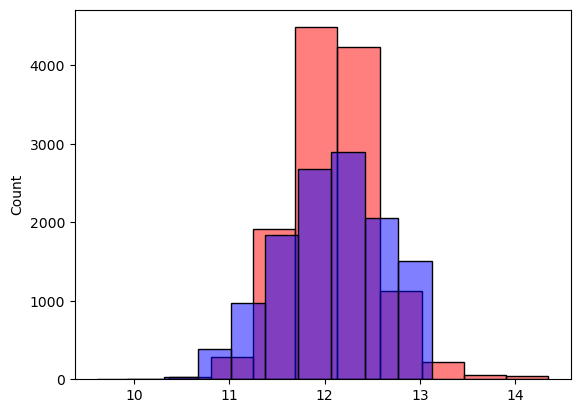

In [30]:
sns.histplot(y_pred_med, color='red', alpha=0.5, bins=10)
sns.histplot(y_train, color='blue', alpha=0.5, bins=10)

In [31]:
def rmse(y, y_pred): 
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [32]:
# first model rmse
rmse(y_train, y_pred)

0.3413135910156677

In [33]:
#second model rmse
rmse(y_train, y_pred_mean)

0.34104146565797144

In [34]:
# third model rmse
rmse(y_train, y_pred_med)

0.3411560102307951

In [35]:
def prepare_X(df, fill_var):
    df_num = df.fillna(fill_var)
    X = df_num.values
    return X

In [36]:
# first model (0)
X_train = prepare_X(df_train, 0)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val, 0)
y_pred = w0 + X_val.dot(w)
round(rmse(y_val, y_pred), 2)


0.33

In [37]:
median_value

435.0

In [38]:
mean_value

537.8705525375618

In [39]:
# second model (mean)
X_train = prepare_X(df_train, mean_value)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val, mean_value)
y_pred = w0 + X_val.dot(w)
round(rmse(y_val, y_pred), 2)

0.33

In [40]:
# third model (median)
X_train = prepare_X(df_train, median_value)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val, median_value)
y_pred = w0 + X_val.dot(w)
round(rmse(y_val, y_pred), 2)

0.33

# Question 4

    Now let's train a regularized linear regression.
    For this question, fill the NAs with 0.
    Try different values of r from this list: [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10].
    Use RMSE to evaluate the model on the validation dataset.
    Round the RMSE scores to 2 decimal digits.
    Which r gives the best RMSE?

If there are multiple options, select the smallest r.

Options:

    0
    0.000001
    0.001
    0.0001

Answer: 0

In [41]:
r_list = [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]

In [42]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [44]:
for item in r_list:
    X_train = prepare_X(df_train, 0)
    w0, w = train_linear_regression_reg(X_train, y_train, r=item)

    X_val = prepare_X(df_val, 0)
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)
    
    print(item, w0, round(score, 2))
    

0 -11.686975241752823 0.33
1e-06 -11.6869591755374 0.33
0.0001 -11.685368865182983 0.33
0.001 -11.670931317832661 0.33
0.01 -11.528493585572914 0.33
0.1 -10.274500281942444 0.33
1 -4.920480897704164 0.33
5 -1.4820957457071808 0.34
10 -0.7899311831451762 0.34


In [ ]:
r = 0.01

In [ ]:
X_train = prepare_X(df_train, 0)
w0, w = train_linear_regression_reg(X_train, y_train, r=r)

X_val = prepare_X(df_val, 0)
y_pred = w0 + X_val.dot(w)
score = rmse(y_val, y_pred)
score

# Question 5

    We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
    Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
    For each seed, do the train/validation/test split with 60%/20%/20% distribution.
    Fill the missing values with 0 and train a model without regularization.
    For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
    What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
    Round the result to 3 decimal digits (round(std, 3))

    Note: Standard deviation shows how different the values are. If it's low, then all values are approximately the same. If it's high, the values are different. If standard deviation of scores is low, then our model is stable.

Options:

    0.16
    0.00005
    0.005
    0.15555

Answer: 0.005

In [46]:
# use different seed values

def train_linear_regression_new_seed(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]


score_list = []

for seed in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    np.random.seed(seed)  #  make the shuffle reproducible
    np.random.shuffle(idx) # shuffle the rows
    # split the data
    df_train = df.iloc[idx[:n_train]] 
    df_val = df.iloc[idx[n_train:n_train + n_val]]
    df_test = df.iloc[idx[n_train + n_val:]]
    # apply logarithmic function and get target variables (y)
    y_train = np.log1p(df_train.median_house_value.values)
    y_val = np.log1p(df_val.median_house_value.values)
    y_test = np.log1p(df_test.median_house_value.values)
    # remove the target var from the sets so we don't accidentally use it to train the model
    del df_train['median_house_value']
    del df_val['median_house_value']
    del df_test['median_house_value']
    X_train = prepare_X(df_train, 0)
    w0, w = train_linear_regression_new_seed(X_train, y_train)

    X_val = prepare_X(df_val, 0)
    y_pred = w0 + X_val.dot(w)
    print(rmse(y_val, y_pred))
    score_list.append(rmse(y_val, y_pred))

0.3559157375978828
0.34755448619784135
0.34510761851954086
0.33994277780989596
0.34664197316822704
0.3341487440320855
0.34575231053156313
0.343491219526014
0.34151808041705034
0.34264921138136556


In [47]:
score_array = np.array(score_list)

In [48]:
round(np.std(score_array), 3)

0.005

# Question 6

    Split the dataset like previously, use seed 9.
    Combine train and validation datasets.
    Fill the missing values with 0 and train a model with r=0.001.
    What's the RMSE on the test dataset?

Options:

    0.35
    0.135
    0.450
    0.245

Answer: 0.35

In [49]:
# use seed 9
np.random.seed(9)  #  make the shuffle reproducible
np.random.shuffle(idx) # shuffle the rows
# split the data
df_train = df.iloc[idx[:n_train]] 
df_val = df.iloc[idx[n_train:n_train + n_val]]
df_test = df.iloc[idx[n_train + n_val:]]
# apply logarithmic function and get target variables (y)
y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)
# remove the target var from the sets so we don't accidentally use it to train the model
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

# combine datasets

df_full_train = pd.concat([df_train, df_val])

X_full_train = prepare_X(df_full_train, 0)
y_full_train = np.concatenate([y_train, y_val])

w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)

X_test = prepare_X(df_test, 0)
y_pred = w0 + X_test.dot(w)
score = rmse(y_test, y_pred)
score


0.34495607741567536